<a href="https://colab.research.google.com/github/yeonmi02/mlproject/blob/main/mlproject_Traffic_Congestion_Prediction_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ❤ 머신러닝 프로젝트 최종 보고서: [교통 혼잡도 예측하기]

| **작성자**   | 20242401 김연미,최성민           |
| **발표 여부** | 보류 |

## 1. 프로젝트 소개
❤ **프로젝트 동기**: 우리가 실생활에서 밀접하게 관련있는 주제면서 꼭 필요한 예측이 뭐가 있을까 고민하던 중 교통이 제일 좋지 않냐는 최성민 학우의 의견으로 교통량 혼잡도를 예측하는 프로젝트를 진행하기로 했습니다.

❤ **프로젝트 목적**: 시간별 교통량과 차량 종류 데이터를 가지고 시간대 별로 혼잡도를 분석하고 어느 시간대와 요일이 제일 혼잡한지 예측하는 목적입니다.

❤ **목표**: 교통량 혼잡도를 예측하기 위해서 XGBoost_LightGBM_Prophet_RandomForest와 같은 모델을 사용할 것이고 성능 비교와 함께 어느 시간대가 제일 복잡한지 볼 예정입니다.

❤ **기대 효과**: 이 프로젝트를 기반으로 사람들이 교통을 사용할 때 언제가 제일 혼잡하고 이동하는 데 시간이 얼마나 걸리는지 앎으로써 계획을 세울 때 도움이 되는 기대효과가 있습니다.

## 2. 주제 관련 배경
❤ **주제를 선택한 이유**: 우리가 어쩌만 가장 많이 이용하는 대중교통부터 목적지를 가기 위해서는 얼마나 걸리는지 또한 교통 상황도 어느 정도 알아야 하는데 혼잡도를 예측하는 프로젝트를 진행하면 예측을 바탕으로 몇시에 이동해야 하는지 알 수 있을거란 생각에 선택했습니다.

❤ **필요성**: 현대인들에게는 교통 상황을 아는 것이 중요하고 시간 절약에도 도움이 되기 때문에 교통의 혼잡도를 예측하는 프로젝트가 직장인들을 비롯한 교통을 이용하는 모든 사람들에게 도움이 될 것이라 생각됩니다.

## 3. 데이터 셋 소개
❤  **데이터 출처**: kaggle 데이터를 사용했습니다. [참고한 데이터의 kaggle 주소](https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset/data)

❤ **전체 행과 열의 수**: 총 5952개의 행이 있고 9개의 칼럼이 있습니다.[Time, Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total, Traffic Situation]

❤ **데이터 변수 설명**

| 컬럼명             | 설명           | 데이터 타입 |
|-------------------|----------------|-------------|
| Time              | 시간           | 문자열      |
| Date              | 날짜           | 문자열      |
| Day of the week   | 요일           | 문자열      |
| CarCount          | 감지된 승용차 수 | 정수형      |
| BikeCount         | 감지된 자전거 수 | 정수형      |
| BusCount          | 감지된 버스 수   | 정수형      |
| TruckCount        | 감지된 트럭 수   | 정수형      |
| Total             | 총 교통량       | 정수형      |
| Traffic Situation | 교통 상황       | 문자열      |

# 데이터 불러오기

In [ ]:
# 관련 라이브러리 임포트하고 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

traffic_2 = pd.read_csv('/content/drive/MyDrive/TrafficTwoMonth.csv')
traffic_2.head(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
5,1:15:00 AM,10,Tuesday,15,1,1,39,56,normal
6,1:30:00 AM,10,Tuesday,14,2,2,27,45,normal
7,1:45:00 AM,10,Tuesday,13,2,1,20,36,normal
8,2:00:00 AM,10,Tuesday,7,0,0,26,33,normal
9,2:15:00 AM,10,Tuesday,13,0,0,34,47,normal


## 4. 데이터 전처리
❤ 교통 데이터 셋의 변수별 특성과 역할에 따라 전처리를 수행했습니다.

 ❤ **Time, Date** : Date와 Time 컬럼을 결합하여 Datetime 컬럼을 생성하고 datetime 타입으로 변환하였고 이후 예측에 불필요하다고 판단하여 원본 Time과 Date 컬럼은 삭제하였습니다.

 ❤ **Day of the week, Traffic Situation** : 범주형 변수로 인식하여 category 타입으로 변환하였고 모델 입력을 위해 원-핫 인코딩을 수행하였습니다. 이후 30분 간격으로 리샘플링할 때 최빈값을 구해 대표값으로 사용하였습니다.

 ❤ **CarCount, BikeCount, BusCount, TruckCount, Total** : 수치형 변수로서 이상치 탐지를 위해 박스플롯 시각화를 수행하였습니다.

 ❤ **결측치 처리** : Datetime 컬럼에 결측치가 있을 경우 해당 행을 제거하여 데이터의 정확성을 확보하였습니다.

 ❤ **인덱스 설정과 정렬** : Datetime 컬럼을 인덱스로 설정하여 시계열 데이터 특성을 반영하였고 전처리 과정 후 컬럼 순서를 정리하여 가독성을 높였습니다.

 ❤ **최종 데이터** : 30분 단위로 리샘플링된 수치형 변수와 범주형 변수를 하나로 합쳐 최종 데이터프레임을 구성하였습니다.


# 데이터 전처리 하기

In [ ]:
import numpy as np

# 시간 데이터를 datatime으로 변환
traffic_2['Datetime'] = pd.to_datetime(traffic_2['Date'].astype(str) + ' ' + traffic_2['Time'], format='%d %I:%M:%S %p', errors='coerce')

In [ ]:
# 예측에 필요하지 않은 예측을 제거하는 코드
traffic_2.drop(columns=['Time', 'Date'], inplace=True)

In [ ]:
# 데이터 중 범주형 데이터들을 인코딩하는 코드
traffic_2['Day of the week'] = traffic_2['Day of the week'].astype('category')
traffic_2['Traffic Situation'] = traffic_2['Traffic Situation'].astype('category')

In [ ]:
# 원핫인코딩이 필요한 칼럼 원핫인코딩하는 코드
traffic_2 = pd.get_dummies(traffic_2, columns=['Day of the week', 'Traffic Situation'])

In [ ]:
# 데이터 결측치 처리하는 코드
traffic_2 = traffic_2.dropna(subset=['Datetime'])

In [ ]:
# 전처리한 특성들을 정리해보는 코드
cols = ['Datetime'] + [col for col in traffic_2.columns if col != 'Datetime']
traffic_2 = traffic_2[cols]

In [ ]:
# 모든 전처리가 저장된 데이터를 다시 출력해보는 코드
traffic_2.to_csv('/content/ProcessedTraffic.csv', index=False)
traffic_2.head()

,Datetime,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,Traffic Situation_heavy,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,1900-01-10 00:00:00,13,2,2,24,41,False,False,False,False,False,True,False,False,False,False,True
1,1900-01-10 00:15:00,14,1,1,36,52,False,False,False,False,False,True,False,False,False,False,True
2,1900-01-10 00:30:00,10,2,2,32,46,False,False,False,False,False,True,False,False,False,False,True
3,1900-01-10 00:45:00,10,2,2,36,50,False,False,False,False,False,True,False,False,False,False,True
4,1900-01-10 01:00:00,11,2,1,34,48,False,False,False,False,False,True,False,False,False,False,True


In [ ]:
# 특성 중 수치형 확인하는 코드
numeric_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

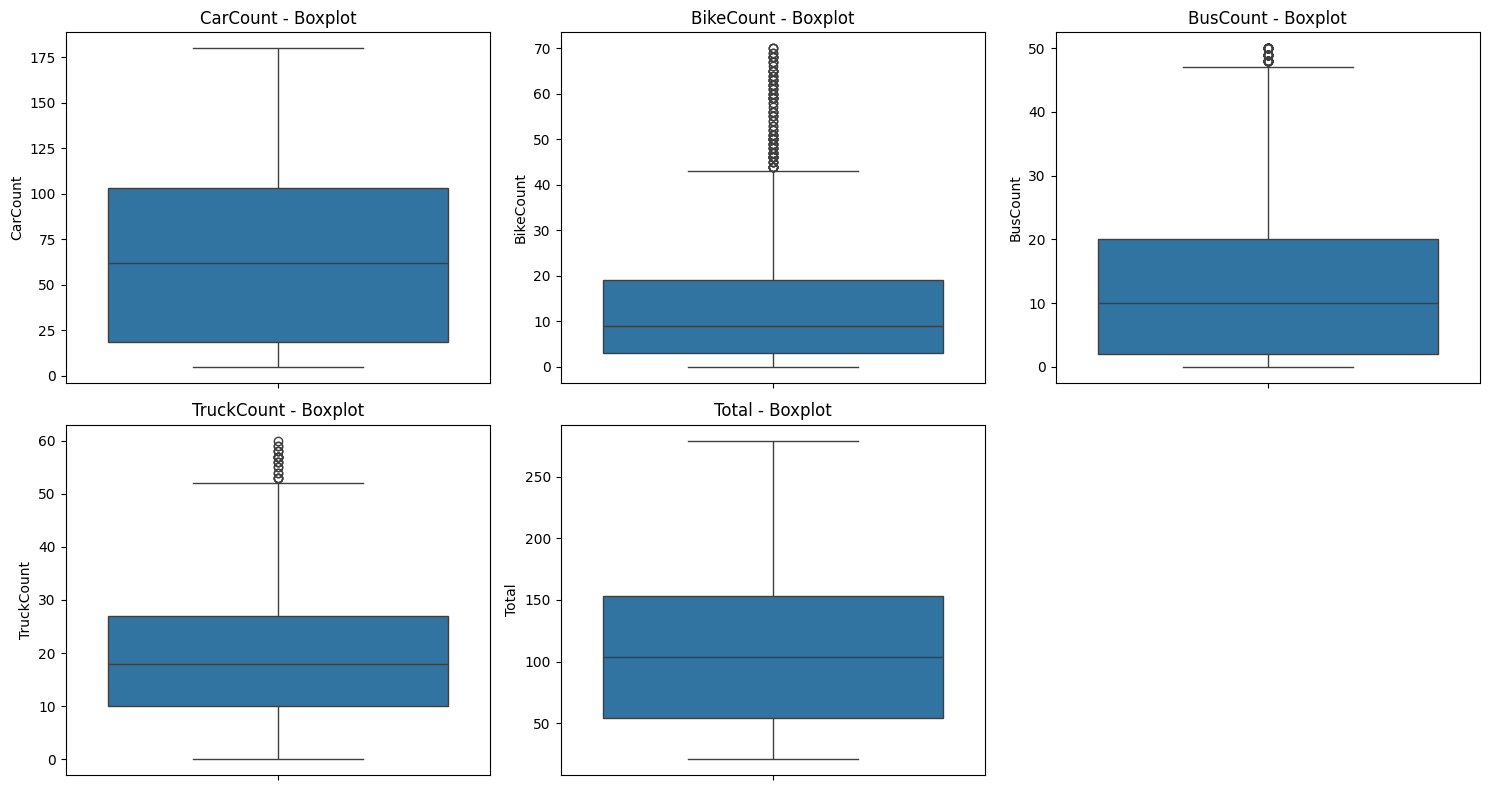

In [ ]:
# 데이터 중 이상치 탐지하는 코드
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=traffic_2[col])
    plt.title(f'{col} - Boxplot')
plt.tight_layout()
plt.show()

In [ ]:
# 시간 데이터를 처리하는 코드
traffic_2['Datetime'] = pd.to_datetime(traffic_2['Datetime'])
traffic_2.set_index('Datetime', inplace=True)

In [ ]:
# 수치형 특성을 30분 간격으로 다시 생성해서 평균을 구하는 코드
numeric_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
traffic_2_num = traffic_2[numeric_cols].resample('30T').mean()

<ipython-input-73-04e4b49b837c>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_2_num = traffic_2[numeric_cols].resample('30T').mean()


In [ ]:
# 모든 특성을 출력
print(traffic_2.columns.tolist())

['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Day of the week_Friday', 'Day of the week_Monday', 'Day of the week_Saturday', 'Day of the week_Sunday', 'Day of the week_Thursday', 'Day of the week_Tuesday', 'Day of the week_Wednesday', 'Traffic Situation_heavy', 'Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']


In [ ]:
# 범주형 특성들도 30분 간격으로 다시 만들면서 최빈값을 구하는 코드
categorical_cols = [ 'Day of the week_Friday', 'Day of the week_Monday', 'Day of the week_Saturday', 'Day of the week_Sunday', 'Day of the week_Thursday', 'Day of the week_Tuesday', 'Day of the week_Wednesday', 'Traffic Situation_heavy', 'Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']
def mode_agg(x):
    return x.mode()[0] if not x.mode().empty else np.nan
traffic_2_cat = traffic_2[categorical_cols].resample('30T').agg(mode_agg)

<ipython-input-75-fd727b734157>:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  traffic_2_cat = traffic_2[categorical_cols].resample('30T').agg(mode_agg)


In [ ]:
# 30분 단위로 재생성된 수치형,범주형 특성을 하나로 합치는 코드
traffic_2_30min = pd.concat([traffic_2_num, traffic_2_cat], axis=1).reset_index()

In [ ]:
# 새로 생성된 데이터를 10개 출력해보는 코드
print(traffic_2_30min.head(10))

             Datetime  CarCount  BikeCount  BusCount  TruckCount   Total  \
0 1900-01-01 00:00:00     13.75       2.00      0.25       31.50   47.50   
1 1900-01-01 00:30:00     15.50       1.75      0.75       25.25   43.25   
2 1900-01-01 01:00:00     11.50       1.50      0.50       29.25   42.75   
3 1900-01-01 01:30:00     15.25       1.75      1.00       19.75   37.75   
4 1900-01-01 02:00:00     13.00       2.00      0.50       27.25   42.75   
5 1900-01-01 02:30:00      9.50       0.50      0.50       29.50   40.00   
6 1900-01-01 03:00:00     13.75       2.75      1.00       31.25   48.75   
7 1900-01-01 03:30:00     13.00       2.00      0.50       25.00   40.50   
8 1900-01-01 04:00:00     57.50       8.50      3.00       12.00   81.00   
9 1900-01-01 04:30:00     75.75      13.25      4.00       21.75  114.75   

   Day of the week_Friday  Day of the week_Monday  Day of the week_Saturday  \
0                   False                   False                     False   
1    

In [ ]:
# datetime 특성에서 서로 간 차이를 계산하고 각 시간 차이가 몇 번 나타나는지를 나타내는 코드
print(traffic_2_30min['Datetime'].diff().value_counts())

Datetime
0 days 00:30:00    1487
Name: count, dtype: int64


In [ ]:
# 전처리 전과 후의 데이터 개수 확인
print(f"원본 데이터 개수: {len(traffic_2)}")
print(f"30분 단위 데이터 개수: {len(traffic_2_30min)}")

원본 데이터 개수: 5952
30분 단위 데이터 개수: 1488


In [ ]:
# 시각화를 위한 준비 코드
plt.figure(figsize=(14, 6))
vehicle_cols = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']

<Figure size 1400x600 with 0 Axes>

## 4-1. 데이터 시각화

❤ **차량 종류 별 교통량**: 다른 칼럼보다 CarCount이 압도적으로 많은 것을 볼 수 있습니다.

❤ **전체 교통량을 시간 순으로**: 시각화한 그래프를 보면 눈에 띄게 적거나 많거나 한 부분 없이 비교적 균일한 모습을 보입니다.

❤ **요일 별 전체 교통량**: 요일도 마찬가지로 모든 요일 비슷한 지표를 보이고 있습니다.

❤ **교통 상황 별 차량 수**: 당연한 결과지만 혼잡도가 높을 수록 챠량 수가 높은 것을 볼 수 있습니다.

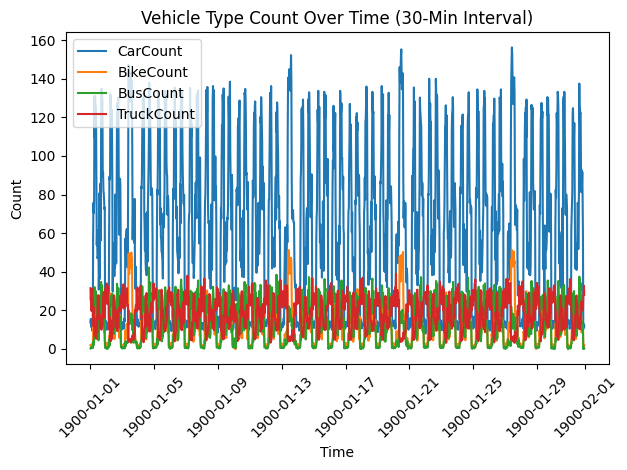

In [ ]:
# 차량 종류 별로 교통량을 시각화하는 코드
for col in vehicle_cols:
    sns.lineplot(data=traffic_2_30min, x='Datetime', y=col, label=col)

plt.title('Vehicle Type Count Over Time (30-Min Interval)')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

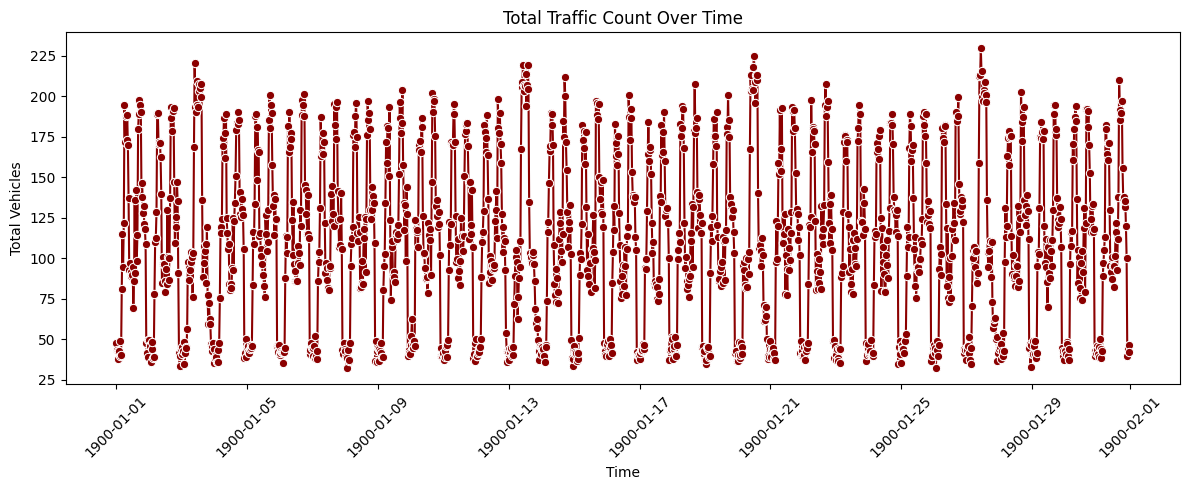

In [ ]:
# 전체 교통량을 시간 순으로 나타내는 코드
plt.figure(figsize=(12, 5))
sns.lineplot(data=traffic_2_30min, x='Datetime', y='Total', color='darkred', marker='o')
plt.title('Total Traffic Count Over Time')
plt.xlabel('Time')
plt.ylabel('Total Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-83-acc9fcd6bf99>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=traffic_2_30min, x='weekday', y='Total', estimator='mean', order=[


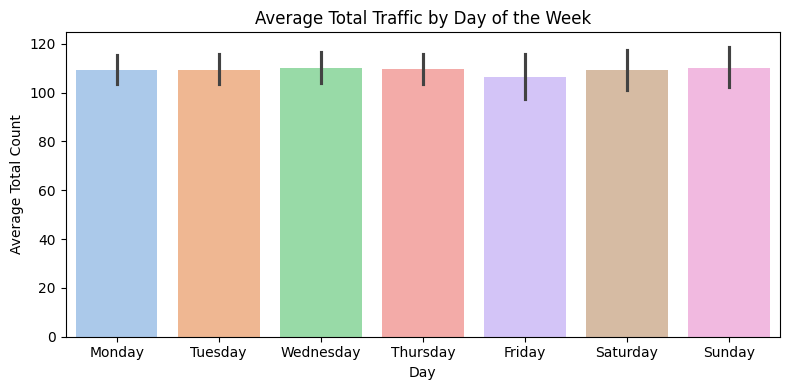

In [ ]:
# 요일별 전체 교통량을 나타내는 코드
weekday_cols = [
    'Day of the week_Monday', 'Day of the week_Tuesday', 'Day of the week_Wednesday',
    'Day of the week_Thursday', 'Day of the week_Friday',
    'Day of the week_Saturday', 'Day of the week_Sunday'
]

traffic_2_30min['weekday'] = traffic_2_30min[weekday_cols].idxmax(axis=1).str.replace('Day of the week_', '')

plt.figure(figsize=(8, 4))
sns.barplot(data=traffic_2_30min, x='weekday', y='Total', estimator='mean', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='pastel')
plt.title('Average Total Traffic by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Average Total Count')
plt.tight_layout()
plt.show()

<ipython-input-84-502bb399c0a9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=traffic_2_30min, x='traffic_level', y='Total', palette='Set2',


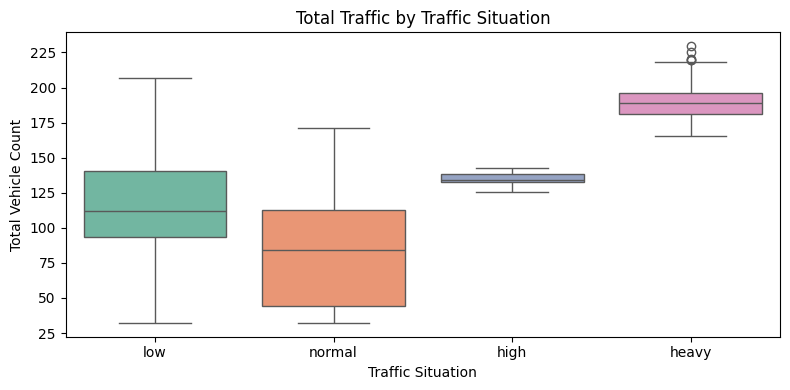

In [ ]:
# 교통 상황별로 전체 차량 수를 나타내는 코드
traffic_cols = [
    'Traffic Situation_low', 'Traffic Situation_normal',
    'Traffic Situation_high', 'Traffic Situation_heavy'
]

traffic_2_30min['traffic_level'] = traffic_2_30min[traffic_cols].idxmax(axis=1).str.replace('Traffic Situation_', '')

plt.figure(figsize=(8, 4))
sns.boxplot(data=traffic_2_30min, x='traffic_level', y='Total', palette='Set2',
            order=['low', 'normal', 'high', 'heavy'])
plt.title('Total Traffic by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Total Vehicle Count')
plt.tight_layout()
plt.show()

## 5. XGBoost 모델 구조

❤ 관련된 라이브러리를 먼저 임포트 했습니다.

❤ **입력 특성**: feature_cols 리스트에 모델에 사용할 입력 변수들을 정의하고 여기에는 차량 종류별 카운트(CarCount, BikeCount, BusCount, TruckCount)와 요일별 변수(Day of the week_Monday ~ Sunday)가 포함되어 있습니다. 모두 traffic_2_30min 데이터프레임에서 해당 특성들만 골라 X 변수에 저장했습니다.

❤ **타겟 변수 설정**: traffic_cols 리스트에는 교통 상황 레벨에 대한 변수들이 포함되어 있습니다(low, normal, high, heavy) 각 행에서 가장 큰 값을 찾아 문자열로 변환하여 traffic_level이라는 새로운 열을 만들었습니다.

❤ 그 다음으로 데이터를 분할해 학습하기 좋게 만들었습니다.

❤ **각종 파라미터**: 부스팅할 트리 개수는 100개이고, 학습률은 0.1, 각 트리의 최대 깊이는 5, 난수 시드는 42로 고정하고 학습했습니다.

# XGBoost 모델 구현하기

In [ ]:
# xgboost 모델을 구현하기 위한 라이브러리 임포트하기
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# 입력용 특성 생성하는 코드
feature_cols = [
    'CarCount', 'BikeCount', 'BusCount', 'TruckCount',
    'Day of the week_Monday', 'Day of the week_Tuesday', 'Day of the week_Wednesday',
    'Day of the week_Thursday', 'Day of the week_Friday', 'Day of the week_Saturday',
    'Day of the week_Sunday'
]

X = traffic_2_30min[feature_cols]

In [ ]:
# 특성 중에 교통 상황 레벨을 타겟 데이터로 설정하는 코드
traffic_cols = [
    'Traffic Situation_low', 'Traffic Situation_normal',
    'Traffic Situation_high', 'Traffic Situation_heavy'
]

traffic_2_30min['traffic_level'] = traffic_2_30min[traffic_cols].idxmax(axis=1).str.replace('Traffic Situation_', '')

y = traffic_2_30min['traffic_level']

In [ ]:
# 레이블 인코딩과 데이터 셋을 나누는 코드
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [ ]:
# xgboost 모델을 생성하고 학습하는 코드
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4,
              num_parallel_tree=None, ...)

## 5-1. XGBoost 모델 성능 평가

❤ 아래 검증 데이터 셋의 성능 평가를 보면 전체 성능이 76%로 나쁘진 않지만 개선할 필요가 있다고 생각했습니다. 특히 High에 대해서는 데이터가 거의 없는 탓인지 예측이 전혀 이루어지지 않았습니다.

❤ **특성 중요도 시각화**: 특성 중요도를 그래프로 시각화한 결과를 보면 차량 종류 별로 카운트가 중요하게 작용한 것을 볼 수 있습니다.


In [ ]:
# 학습된 xgboost 모델의 검증데이터를 평가하는 코드
y_pred = xgb_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {acc:.3f}')
print('\nClassification Report:\n', classification_report(y_val, y_pred, target_names=le.classes_))

Validation Accuracy: 0.762

Classification Report:
               precision    recall  f1-score   support

       heavy       0.87      0.94      0.90        48
        high       0.00      0.00      0.00         1
         low       0.65      0.56      0.60        95
      normal       0.79      0.84      0.81       154

    accuracy                           0.76       298
   macro avg       0.57      0.58      0.58       298
weighted avg       0.75      0.76      0.76       298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


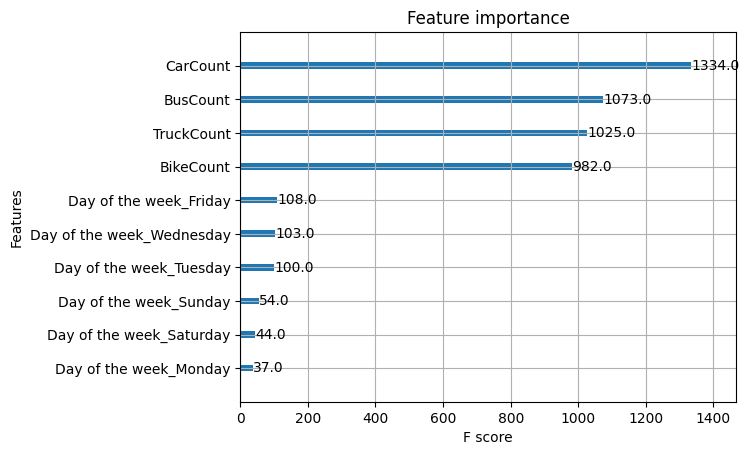

In [ ]:
# 학습된 xgboost 모델의 특성 중요도 보여주는 코드
xgb.plot_importance(xgb_model, max_num_features=10)
plt.show()

In [ ]:
# 라이브러리 임포트
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 학습된 모델을 바탕으로 예측하고 정확도를 출력하는 코드
y_pred = xgb_model.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {acc:.3f}')

Validation Accuracy: 0.762


In [ ]:
# 검증 데이터에 대한 분류 성능을 출력하는 코드
print('\nClassification Report:')
print(classification_report(y_val, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

       heavy       0.87      0.94      0.90        48
        high       0.00      0.00      0.00         1
         low       0.65      0.56      0.60        95
      normal       0.79      0.84      0.81       154

    accuracy                           0.76       298
   macro avg       0.57      0.58      0.58       298
weighted avg       0.75      0.76      0.76       298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 5-2 혼동행렬

❤ 모델이 예측한 결과와 실제 정답을 비교해 분류 성능을 자세히 보여주는 2차원 형태의 표입니다.

❤ 검증 데이터 셋의 평가를 바탕으로 혼동행열을 시각화한 모습을 보면 High의 지표가 0인 것을 확인할 수 있습니다.

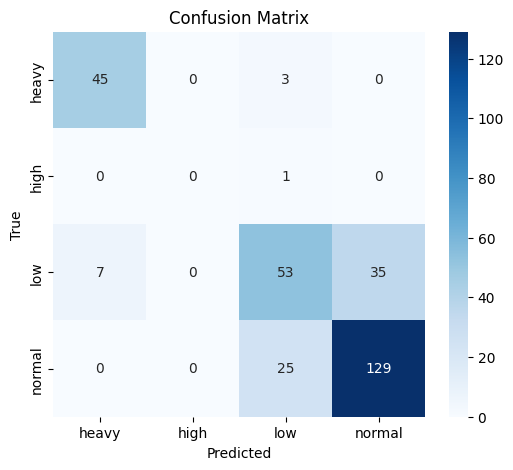

In [ ]:
# 검증 데이터에 대한 혼동행렬을 계산하고 시각화하는 코드
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## 5-3. 모델 학습을 바탕으로 혼잡도 예측해보기

❤ **MSE** : 오차를 제곱한 값을 평균낸 값으로 0.339로 적당하지만 검증이 필요합니다.

❤ **MAE** : 예측값과 실제값 차이의 절대값의 평을 나타내는 수치이고 0.272로 괜찮은 수치이고 MSE보다 덜 민감해 보입니다.

❤ **결정계수** : 결정계수는 1에 가까울수록 성능이 좋은 것인데 0.699로 70프로이기 때문에 성능이 나빠보이진 않습니다.

❤ **예측 결과**: 1900-01-01 00:00:00이 제일 혼잡하다고 한 결과를 바탕으로 생각해보면 자정 12시가 혼잡하다고 예측했습니다.

In [ ]:
# 예측하는 코드
y_pred = xgb_model.predict(X_val)

# 예측값을 데이터프레임에 넣는 코드
traffic_2_30min.loc[X_val.index, 'y_pred'] = y_pred

In [ ]:
# 회귀 성능 지표를 출력하는 코드
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(f'MSE: {mean_squared_error(y_val, y_pred):.3f}')
print(f'MAE: {mean_absolute_error(y_val, y_pred):.3f}')
print(f'R²: {r2_score(y_val, y_pred):.3f}')

# 언제 혼잡도가 높은지 출력하는 코드
most_congested_pred = traffic_2_30min.loc[traffic_2_30min['y_pred'].idxmax()]
print(most_congested_pred[['Datetime', 'y_pred']])

MSE: 0.339
MAE: 0.272
R²: 0.699
Datetime    1900-01-01 00:00:00
y_pred                      3.0
Name: 0, dtype: object


## 새로운 시간 데이터 입력받은 것을 혼잡도 예측 출력해보기

In [153]:
import pandas as pd
import datetime

feature_cols = [
    'CarCount', 'BikeCount', 'BusCount', 'TruckCount',
    'Day of the week_Monday', 'Day of the week_Tuesday', 'Day of the week_Wednesday',
    'Day of the week_Thursday', 'Day of the week_Friday', 'Day of the week_Saturday',
    'Day of the week_Sunday'
]

def predict_traffic_from_time(time_str, car=0, bike=0, bus=0, truck=0):
    """
    time_str: 'YYYY-MM-DD HH:MM:SS' 형식 문자열 또는 datetime 객체
    차량 수는 기본 0으로 세팅, 필요시 값 넣으면 됨.
    """
    # 문자열이면 datetime 객체로 변환하는 코드
    if isinstance(time_str, str):
        dt = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
    else:
        dt = time_str

    # 요일 변수 생성 코드
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_of_week = dt.strftime('%A')
    day_features = {f'Day of the week_{day}': 1 if day == day_of_week else 0 for day in days}

    vehicle_features = {
        'CarCount': car,
        'BikeCount': bike,
        'BusCount': bus,
        'TruckCount': truck
    }


    features = {**vehicle_features, **day_features}


    X_input = pd.DataFrame([features])

    # 없는 컬럼은 0으로 채우는 코드
    for col in feature_cols:
        if col not in X_input.columns:
            X_input[col] = 0


    X_input = X_input[feature_cols]

    # 예측하는 코드
    pred_encoded = xgb_model.predict(X_input)[0]
    pred_label = le.inverse_transform([pred_encoded])[0]

    print(f"입력 시간: {dt}, 예측 교통 혼잡도: {pred_label}")

def predict_traffic_interactive():
    time_str = input("예측할 시간을 'YYYY-MM-DD HH:MM:SS' 형식으로 입력하세요: ")
    try:
        car = int(input("CarCount 입력 (기본 0): ") or 0)
        bike = int(input("BikeCount 입력 (기본 0): ") or 0)
        bus = int(input("BusCount 입력 (기본 0): ") or 0)
        truck = int(input("TruckCount 입력 (기본 0): ") or 0)
    except ValueError:
        print("숫자를 입력하세요. 기본값 0으로 설정합니다.")
        car, bike, bus, truck = 0, 0, 0, 0

    predict_traffic_from_time(time_str, car, bike, bus, truck)

# 실행
predict_traffic_interactive()


예측할 시간을 'YYYY-MM-DD HH:MM:SS' 형식으로 입력하세요: 2025-06-03 00:00:00
CarCount 입력 (기본 0): 500
BikeCount 입력 (기본 0): 100
BusCount 입력 (기본 0): 120
TruckCount 입력 (기본 0): 600
입력 시간: 2025-06-03 00:00:00, 예측 교통 혼잡도: heavy


## 6. LightGBM 모델 구조

❤ **데이터 셋 준비**: 학습 데이터와 테스트 데이터 등 모델을 학습하기 위한 데이터들을 분할하였습니다.

❤ **하이퍼파라미터 설정**: num_class로 총 클래수 타겟을 설정하고, metric로 로그 손실을 사용하도록 했습니다. 또한 verbosity로 학습 중에 출력되는 로그의 상세도를 조절했습니다. boosting_type으로 부스팅 방법을 그레디언트 부스팅 결정트리로 했습니다. 모델 학습 과정에서는 최대 1000회 트리 생성을 시도하도록 했습니다. 또한 100라운드마다 평가 로그를 출력했습니다.

# LightGBM 구현하기

In [ ]:
# 관련 라이브러리 임포트 하기
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [154]:
# 특성 데이터와 타겟 데이터를 분류하는 코드
target_col = 'traffic_level'

X = traffic_2_30min.drop(columns=target_col)
y = traffic_2_30min[target_col]

In [ ]:
# LightGBM을 구현하기 위한 데이터를 생성하는 코드
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

In [ ]:
# 모델 학습에 필요한 파라미터를 설정한 코드
params = {
    'objective': 'multiclass',
    'num_class': len(y.unique()),
    'metric': 'multi_logloss',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42
}

In [ ]:
# LightGBM 모델 학습하는 코드
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[val_data],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=50),
        lgb.log_evaluation(period=100)
    ]
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	valid_0's multi_logloss: 0.505202


## 6-1. LightGBM 성능 평가

❤ 여전히 High 클래스에 대해서는 예측을 전혀 못하고 있는 것을 알 수 있습니다.

❤ 나머지 클래스들은 어느 정도 예측을 하고 있는 것으로 보이고 클래스별로 차이가 나는 것은 아무래도 데이터의 양이 적어 그만큼 학습될 기회가 적었던 것 같습니다. 전체 정확도는 77%로 준수하지만 특정 클래스에 몰려 있는 것 같아 아쉬운 결과인 것 같습니다.

In [ ]:
# 학습이 완료된 모델을 가지고 검증 데이터셋에 대한 평가와 성능을 평가하는 코드
y_pred_proba = lgb_model.predict(X_val)
y_pred = y_pred_proba.argmax(axis=1)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.7651006711409396

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.00      0.00      0.00         1
           2       0.65      0.59      0.62        95
           3       0.78      0.82      0.80       154

    accuracy                           0.77       298
   macro avg       0.58      0.59      0.59       298
weighted avg       0.76      0.77      0.76       298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6-2. 각종 시각화

❤ 먼저 특성 중요도 시각화를 보면 앞서 학습한 XGBoost 모델과 같은 결과인 차량 종류별 개수가 제일 높게 나타난 것을 볼 수 있습니다.

❤ 또한 혼동행열을 계산하고 시각화한 것을 보면 마찬가지로 High 클래스에 대해서는 전혀 예측하지 못하는 것 그대로 수치로 보여주고 있습니다.

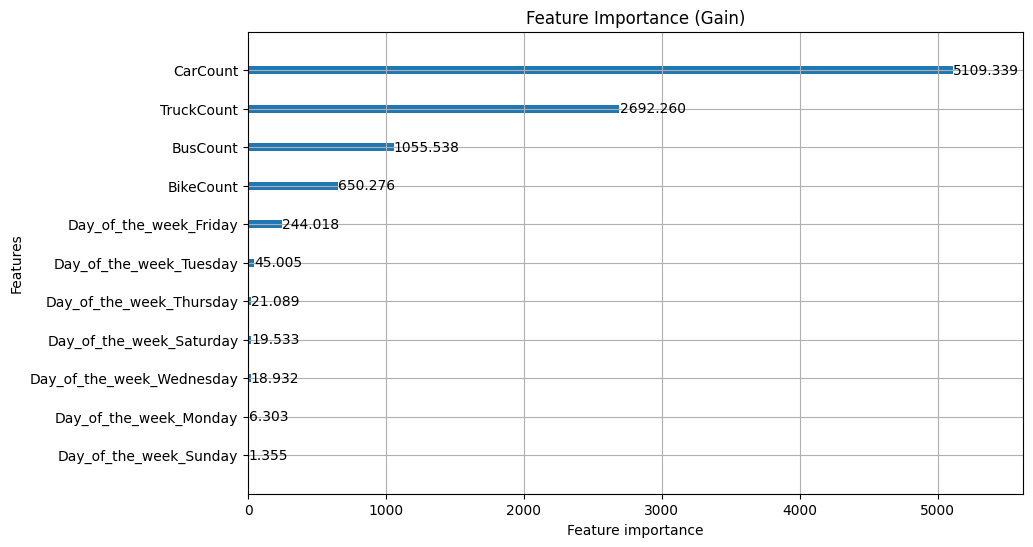

In [ ]:
# 학습된 모델의 특성 중요도를 시각화하는 코드
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='gain', figsize=(10,6))
plt.title('Feature Importance (Gain)')
plt.show()

In [ ]:
# 검증 데이터 셋에 대한 예측 정확도를 출력하는 코드
from sklearn.metrics import classification_report, accuracy_score

print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}\n")

Accuracy: 0.7651



In [ ]:
# 라이브러리 임포트하기
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# 혼동행열 생성
cm = confusion_matrix(y_val, y_pred)

class_names = sorted(y.unique())

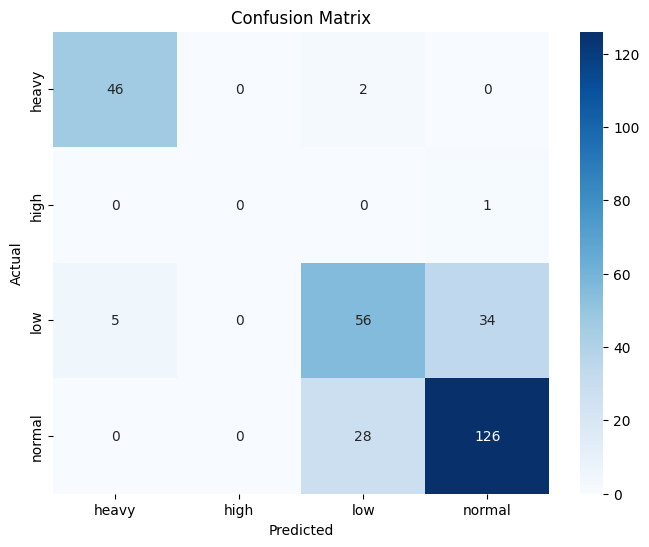

In [ ]:
# 혼동행열을 시각화해서 성능을 보여주는 코드
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 6-3. 언제 가장 혼잡도가 높은지 출력


❤ **MSE** : 오차를 제곱한 값을 평균낸 값으로 5.922로 너무 높은 수치를 나타내고 있습니다.

❤ **MAE** : 예측값과 실제값 차이의 절대값의 평을 나타내는 수치이고 2.296로 높은 수치인 것을 보아 모델 학습이 잘못 되었다는 것을 알 수 있습니다.

❤ **결정계수** : 결정계수는 1에 가까울수록 성능이 좋은 것인데 -4.251로 전혀 성능이 나오지 않았고 어딘가 모델이 이상하다는 것을 의미합니다.

❤ **예측 결과**: 그런 모델로 예측해본 결과 1900-01-01 00:00:00이 제일 혼잡, 즉 자정 12시가 혼잡하다고 예측했습니다.

In [160]:
# LightGBM 모델로 예측하는 코드
y_pred_lgb = lgb_model.predict(X_val)

# 예측 결과가 2차원일 경우에는 argmax로 클래스 선택하는 코드
if len(y_pred_lgb.shape) == 2 and y_pred_lgb.shape[1] > 1:
    y_pred_lgb_class = np.argmax(y_pred_lgb, axis=1)
    traffic_2_30min.loc[X_val.index, 'y_pred_lgb'] = y_pred_lgb_class
else:
    traffic_2_30min.loc[X_val.index, 'y_pred_lgb'] = y_pred_lgb

In [161]:
# 회귀 평가 지표를 출력하는 코드
y_pred_single = y_pred_lgb[:, 0]

print(f'LightGBM MSE: {mean_squared_error(y_val, y_pred_single):.3f}')
print(f'LightGBM MAE: {mean_absolute_error(y_val, y_pred_single):.3f}')
print(f'LightGBM R²: {r2_score(y_val, y_pred_single):.3f}')

# 언제 혼잡도가 제일 높은지 출력하는 코드
most_congested_pred_lgb = traffic_2_30min.loc[traffic_2_30min['y_pred_lgb'].idxmax()]
print(most_congested_pred_lgb[['Datetime', 'y_pred_lgb']])

LightGBM MSE: 5.922
LightGBM MAE: 2.296
LightGBM R²: -4.251
Datetime      1900-01-01 00:00:00
y_pred_lgb                    3.0
Name: 0, dtype: object


# XGBoost/LightGBM 성능 비교

In [ ]:
# 관련 라이브러리 임포트
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 검증 데이터를 가지고 XGBoost/LightGBM 모델 예측하는 코드
y_pred_xgb = xgb_model.predict(X_val)

y_pred_lgb_proba = lgb_model.predict(X_val)
y_pred_lgb = y_pred_lgb_proba.argmax(axis=1)

In [ ]:
# XGBoost/LightGBM 모델 성능 비교
print("=== XGBoost 성능 ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_xgb):.4f}")
print(classification_report(y_val, y_pred_xgb, target_names=le.classes_))

print("=== LightGBM 성능 ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred_lgb):.4f}")
print(classification_report(y_val, y_pred_lgb, target_names=le.classes_))

=== XGBoost 성능 ===
Accuracy: 0.7617
              precision    recall  f1-score   support

       heavy       0.87      0.94      0.90        48
        high       0.00      0.00      0.00         1
         low       0.65      0.56      0.60        95
      normal       0.79      0.84      0.81       154

    accuracy                           0.76       298
   macro avg       0.57      0.58      0.58       298
weighted avg       0.75      0.76      0.76       298

=== LightGBM 성능 ===
Accuracy: 0.7651
              precision    recall  f1-score   support

       heavy       0.90      0.96      0.93        48
        high       0.00      0.00      0.00         1
         low       0.65      0.59      0.62        95
      normal       0.78      0.82      0.80       154

    accuracy                           0.77       298
   macro avg       0.58      0.59      0.59       298
weighted avg       0.76      0.77      0.76       298



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Prophet 모델 구현하기

In [ ]:
# 관련 라이브러리 임포트
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Prophet 모델이 요구하는 형식으로 컬럼명을 변경
# 'ds'는 날짜/시간, 'y'는 예측하고자 하는 대상 변수
df_prophet = traffic_2_30min[['Datetime', 'Total']].rename(columns={
    'Datetime': 'ds',
    'Total': 'y'
})

In [ ]:
# 결측치가 존재하면 모델 학습 및 예측에 오류가 발생할 수 있으므로 제거
df_prophet.dropna(subset=['ds', 'y'], inplace=True)

In [ ]:
# Prophet 모델을 초기화하는 코드
# 일간(daily) 및 주간(weekly) seasonality를 활성화하여 시간대별, 요일별 패턴을 반영하도록 설정
model = Prophet(daily_seasonality=True, weekly_seasonality=True)

In [ ]:
# 모델을 학습시키는 코드
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsrpqfncd/8tphgtu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsrpqfncd/6gkfk1vi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45534', 'data', 'file=/tmp/tmpsrpqfncd/8tphgtu0.json', 'init=/tmp/tmpsrpqfncd/6gkfk1vi.json', 'output', 'file=/tmp/tmpsrpqfncd/prophet_modelwczgpn9n/prophet_model-20250603102844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:28:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:28:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 예측에 사용할 미래 시계열 데이터를 생성
# 30분 단위로 7일(=336 스텝) 분량을 생성
future = model.make_future_dataframe(periods=336, freq='30min')

In [ ]:
# 생성된 미래 데이터를 기반으로 예측을 수행
forecast = model.predict(df_prophet)
forecast_trimmed = forecast.iloc[:len(traffic_2_30min)]

In [ ]:
# 예측 결과를 시각화
forecast  = model.predict(future)

traffic_2_30min['y_pred_prophet'] = forecast_trimmed['yhat'].values

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

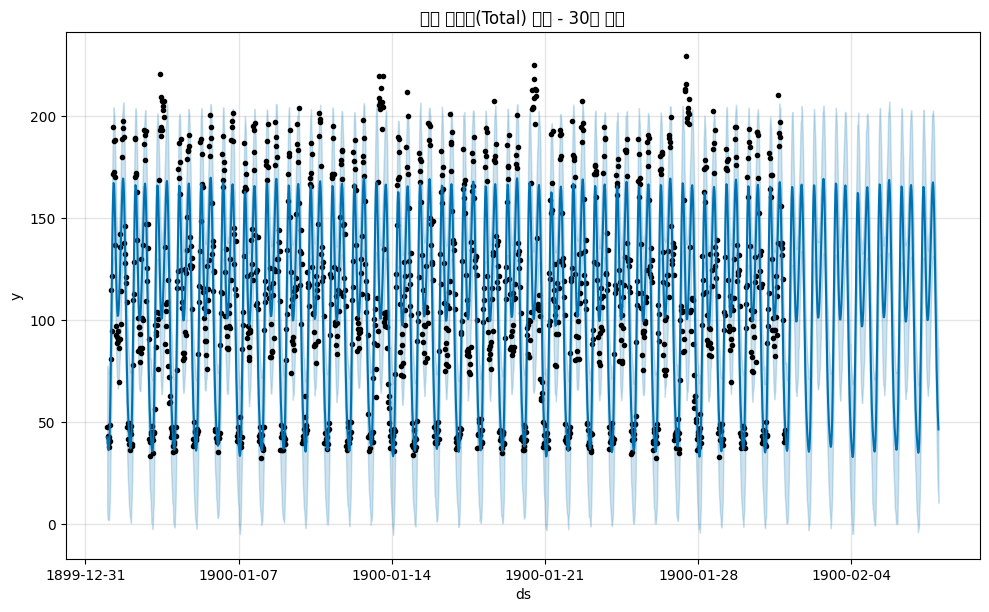

In [ ]:
# 예측 결과를 구성하는 트렌드, 일간 및 주간 패턴 등을 시각화
model.plot(forecast )
plt.title('교통 혼잡도(Total) 예측 - 30분 단위')
plt.show()

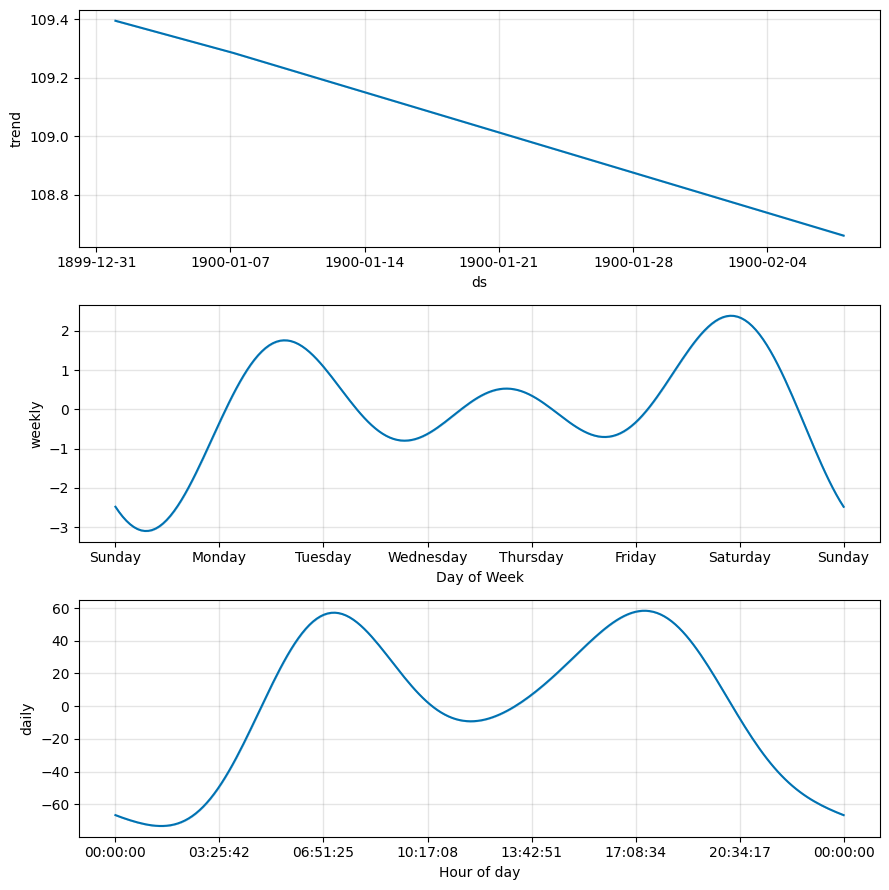

In [ ]:
model.plot_components(forecast )
plt.show()

In [ ]:
# 평가하는 코드
forecast_eval = forecast[['ds', 'yhat']].set_index('ds')
actual_eval = df_prophet.set_index('ds')

In [ ]:
# 공통 기간만 남기는 코드
df_eval = actual_eval.join(forecast_eval, how='inner')

In [ ]:
# 지표 계산하는 코드
y_true = df_eval['y']
y_pred = df_eval['yhat']

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

In [ ]:
# 지표 계산 결과를 나타나는 코드
print("Prophet 예측 성능 평가")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score                  : {r2:.4f}")

Prophet 예측 성능 평가
Mean Absolute Error (MAE) : 20.36
Mean Squared Error (MSE)  : 813.20
Root Mean Squared Error (RMSE): 28.52
R² Score                  : 0.6949


## 프롬햇 모델을 바탕으로 언제가 혼잡도가 제일 높은지 예측하기

❤ 프롬햇 모델을 학습한 것을 바탕으로 우리의 예측 목표인 교통 혼잡도가 언제 제일 높을지 예측한 결과를 출력해보는 코드를 실행했습니다.

❤ 프롬햇 모델의 예측한 시간대는 17시로 나왔습니다.

In [ ]:
# datetime 특성이 datetime 타입인지 확인하고 아니라면 변환하기
traffic_2_30min['Datetime'] = pd.to_datetime(traffic_2_30min['Datetime'])

#  Hour 특성을 생성하는 코드
traffic_2_30min['Hour'] = traffic_2_30min['Datetime'].dt.hour

In [ ]:
# 그룹별 평균을 계산하고 언제 교통 혼잡도가 높은지 출력하는 코드
hourly_congestion_prophet = traffic_2_30min.groupby('Hour')['y_pred_prophet'].mean()
peak_hour_prophet = hourly_congestion_prophet.idxmax()
print(f'Prophet 모델 기준 가장 혼잡한 시간대: {peak_hour_prophet}시')

Prophet 모델 기준 가장 혼잡한 시간대: 17시


# RandomForest 모델 구현하기

In [ ]:
# 관련 라이브러리 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 예측 대상 변수(y)와 입력 특성 변수(X)를 지정
target_col = 'Total'
feature_cols = [col for col in traffic_2_30min.columns if col not in ['Datetime', target_col, 'weekday', 'traffic_level']]

X = traffic_2_30min[feature_cols]
y = traffic_2_30min[target_col]

In [ ]:
# 전체 데이터를 훈련용과 테스트용으로 분할. (비율: 훈련 80%, 테스트 20%)
# 시계열 데이터이므로 시계 순서를 유지하기 위해 shuffle=False로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# 랜덤 포레스트 회귀(Random Forest Regressor) 모델을 생성하고 학습시킴
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# 테스트 데이터를 사용하여 예측을 수행

y_pred = model.predict(X_test)

In [ ]:
# 예측 성능을 평가
# 평균 제곱 오차(MSE)와 결정계수(R2)를 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 평가 결과를 출력
print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.4f}')

Mean Squared Error: 9.70
R2 Score: 0.9964


<ipython-input-137-6ab0a4ad1285>:11: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-137-6ab0a4ad1285>:11: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-137-6ab0a4ad1285>:11: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-137-6ab0a4ad1285>:11: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-

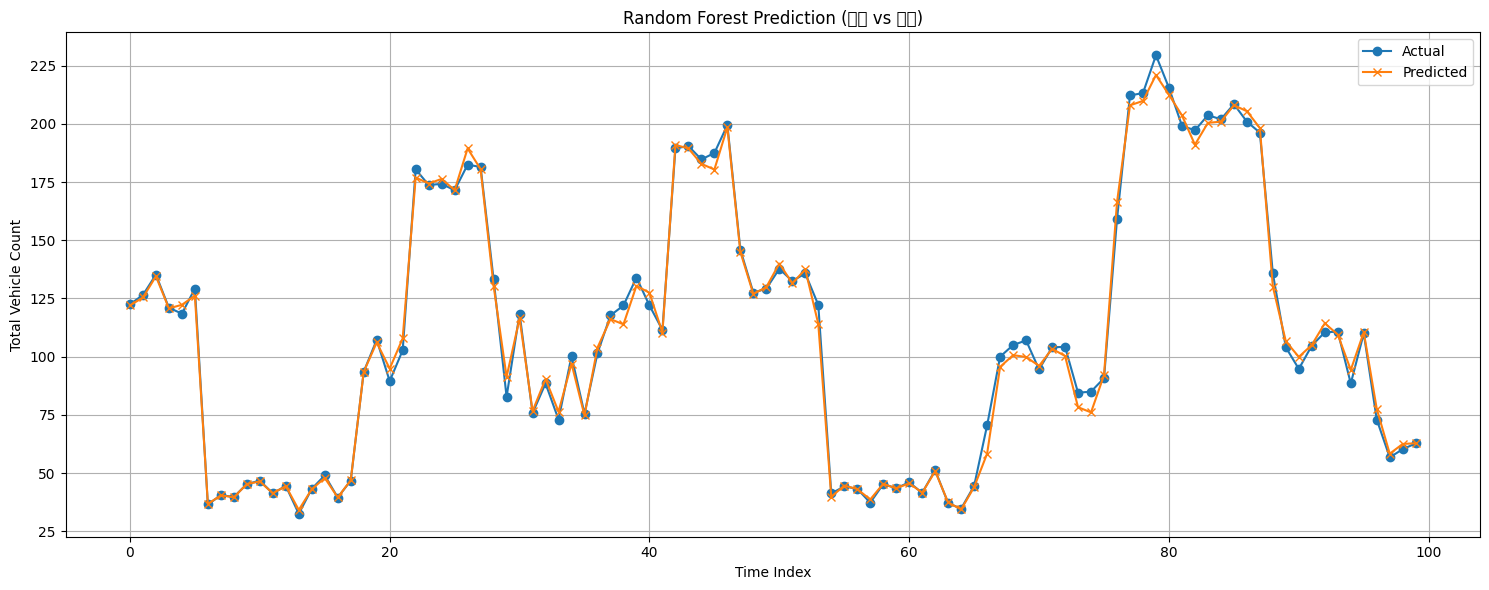

In [ ]:
# 실제 관측값과 예측값을 시각적으로 비교함

plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Random Forest Prediction (예측 vs 실제)')
plt.xlabel('Time Index')
plt.ylabel('Total Vehicle Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 관련 라이브러리 임포트하는 코드
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# 여러 지표 계산하기
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 여러 지표 출력하는 코드
print("RandomForest 회귀 모델 성능")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score                  : {r2:.4f}")

RandomForest 회귀 모델 성능
Mean Absolute Error (MAE) : 2.20
Mean Squared Error (MSE)  : 9.70
Root Mean Squared Error (RMSE): 3.11
R² Score                  : 0.9964


## 학습한 모델을 바탕으로 예측해보기

❤ 랜덤프로스트 모델을 바탕으로 언제가 제일 교통 혼잡도가 높은지 출력해보기 위해서 출력을 해봤습니다.

❤ 랜덤프로스트 모델로 예측한 결과는 16시이고 평균 차량 수는 176.3대로 높은 수치를 기록했습니다.

In [ ]:
# 예측한 결과를 테스트 프레임에 넣기
traffic_2_30min.loc[X_test.index, 'y_pred_rf'] = y_pred

In [ ]:
# 시간 특성 생성하는 코드
if 'Hour' not in traffic_2_30min.columns:
    traffic_2_30min['Hour'] = pd.to_datetime(traffic_2_30min['Datetime']).dt.hour

# 예측값 기준 시간대별 평균 혼잡도를 계산하는 코드
hourly_congestion = traffic_2_30min.loc[X_test.index].groupby('Hour')['y_pred_rf'].mean()

In [ ]:
# 언제 가장 혼잡도가 높은지 계산하고 출력하는 코드
peak_hour = hourly_congestion.idxmax()
peak_value = hourly_congestion.max()

print(f'Random Forest 예측 기준 가장 혼잡한 시간대는 **{peak_hour}시**, 평균 차량 수: {peak_value:.1f}대')

Random Forest 예측 기준 가장 혼잡한 시간대는 **16시**, 평균 차량 수: 176.3대


# Prophet/RandomForest 모델 성능 비교

In [ ]:
print("Prophet 예측 성능 평가")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score                  : {r2:.4f}\n")

print("RandomForest 회귀 모델 성능")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE)  : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score                  : {r2:.4f}")

Prophet 예측 성능 평가
Mean Absolute Error (MAE) : 2.20
Mean Squared Error (MSE)  : 9.70
Root Mean Squared Error (RMSE): 3.11
R² Score                  : 0.9964

RandomForest 회귀 모델 성능
Mean Absolute Error (MAE) : 2.20
Mean Squared Error (MSE)  : 9.70
Root Mean Squared Error (RMSE): 3.11
R² Score                  : 0.9964


## 9. 프로젝트 결과

1. XGBoost 모델

❤ 기존 15분 단위였던 시간 데이터를 30분으로 바꿔서 전처리하고 다른 칼럼들도 특성에 맞게 전처리를 한 다음 XGBoost 모델을 학습시켰습니다.

❤ 모델을 학습 시킨 전체 성능의 정확도는 77프로로 높은 편이었지만 High 클래스는 데이터가 많지 않아 학습이 원할하지 않았고 그래서 예측이 0%가 나왔습니다.

❤ XGBoost 모델을 바탕으로 새로운 시간대를 입력하면 교통의 혼잡도를 출력하는 코드를 챗 지피티의 도움을 받아 작성해 이용자들이 쉽게 이용할 수 있도록 만들었습니다.

2. LightGBM 모델

❤ 앞서 전처리했던 데이터들을 가지고 LightGBM 모델을 학습했습니다.

❤ 학습이 완료된 모델의 성능 평가를 출력했더니 76프로로 나쁘지 않았지만 MSE,MAE 지수를 비롯해서 결정계수는 비정상적인 성능을 보여 모델이 잘못되었다는 것을 결과를 얻었습니다.

❤ XGBoost 와는 너무 떨어지는 성능이 나왔기 때문에 새로운 데이터를 입력받아 예측하는 것은 적절하지 않다고 판단했습니다.

## 10. 레퍼런스 개선점

❤ 우선 우리가 예측할 목표 칼럼인 교통 혼잡도에서 High 클래스의 데이터가 너무 부족해서 모델이 정상적인 학습을 할 수 없다는 점이 아쉬웠습니다. 그래서 각 클래스에 부합하는 데이터들을 충분하게 수집하는 것이 첫 번째 개선점입니다. 또한 LightGBM 모델에서 성능이 너무 낮게 나온 것이 아쉬웠습니다. 여러 이유가 있을거라 생각되지만 데이터 양을 충분히 수집하고 모델에서 학습하는 목표가 잘못 설정되었을 가능성이 있어 개선해야 한다고 생각합니다.

## 11. kaggle에 있는 다른 사람 코드와 다른 점

❤ 우선 데이터 전처리 과정에서부터 차이를 보이는데 kaggle에서는 시간 간격을 15분에서 5분단위로 줄여 예측을 진행했고 저희의 프로젝트에서는 30분 단위로 전처리하여 예측을 진행했습니다. 각각의 장단점이 있을거라 생각됩니다. 또한 저희는 시간 데이터를 직접 처리하지 않고 피처로 만들어서 학습시켰지만 kaggle에서는 시계열 패턴을 그대로 모델에 학습시킨 부분이 달랐습니다. 저희 프로젝트는 학습 시간이 빠르고 표현에 유용하다는 점이 돋보이고 kaggle에서는 시간 의존성을 잘 반영한다는 장점이 있습니다.

## 12. 추후 발전 방향

❤ 먼저 데이터를 더 많이 수집하여 모델을 구축하고 학습한다면 사람들이 지역별로 자신이 교통을 이용할 시간대를 입력하면 차량이 평균 몇 대가 지나다니는지 혼잡도는 어떻게 되는지 한 눈에 파악할 수 있게 발전할 수 있습니다. 특히 사이트를 구축해서 만들거나 간편하게 핸드폰 앱으로 만들어서 접근성이 좋게 할 수 있고 유용하게 사용할 수 있을거라 생각됩니다.

## 13. 프로젝트 진행 소감

✌ 김연미:

✌ 최성민: